# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_data_agm.csv')

In [3]:
x = dataset.iloc[:, 0:20].values
#y_real = dataset.iloc[:, -2].values
y_class = dataset.iloc[:, -1].values

In [4]:
dataset.describe()

,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,MRRTF,LULC,...,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R,grid_code,well_M
count,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,...,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,15.371678,3.065349,299.495682,3.168101,1.817620,0.540312,0.529664,4.328115,2.870674,2.682955,...,0.005404,1.010695,88.867481,0.040774,7.829934,0.035829,2.029773,3.877727,3.257841,2.210227
std,11.116370,2.029857,79.810166,1.843567,0.819711,0.535954,0.377463,2.212529,2.120788,0.982308,...,0.044890,0.747442,136.894210,0.035051,1.094868,1.395012,0.554200,0.695227,4.420200,1.156196
min,0.084850,0.000000,131.000000,0.096070,0.381920,0.030010,0.000000,0.000000,0.000000,1.000000,...,-0.266670,0.000000,0.000000,0.000000,4.917240,-6.297300,1.000000,1.000000,0.020000,1.000000
25%,5.391325,1.328830,231.000000,2.035155,1.195585,0.234363,0.225397,2.680390,0.515553,2.000000,...,-0.008445,0.632460,23.763597,0.016670,7.201628,-0.864860,2.000000,4.000000,0.740000,1.000000
50%,14.257625,2.954505,310.000000,2.750850,1.688770,0.452635,0.463935,4.804125,2.960480,2.000000,...,0.000000,0.894430,56.133205,0.037250,7.595675,-0.189190,2.000000,4.000000,1.470000,2.000000
75%,22.214573,4.566290,370.000000,4.028485,2.229880,0.693763,0.751048,6.266105,4.754570,3.000000,...,0.017890,1.341640,107.539073,0.052660,8.110140,0.810810,2.000000,4.000000,4.437500,3.000000
max,50.678840,8.212820,517.000000,14.400130,4.706010,7.189150,1.748140,7.778840,6.601090,5.000000,...,0.666670,8.402380,3301.999020,0.412390,11.444970,13.567570,4.000000,5.000000,20.000000,4.000000


1    1700
2     950
3     875
4     875
Name: well_M, dtype: int64


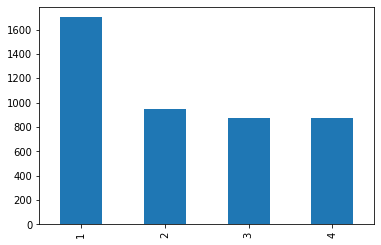

In [5]:
print(pd.value_counts(dataset['well_M']))
pd.value_counts(dataset['well_M']).plot.bar()


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### check

from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import StandardScaler
acc = []
for i in range(1,10):
   
        
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2, random_state = i)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    classifier = SVC(kernel = 'poly',C=0.1,degree = 2, gamma= 0.1)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(1,10),acc, c = 'blue')
plt.xlabel('hyperparameter (no of trees)')
plt.ylabel('Accuracy')
plt.show()

# Training SVM

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma= 'auto')#,C=0.1,degree = 2, gamma= 0.1
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predicting Test Result

In [9]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [3 3]
 [3 3]
 ...
 [1 1]
 [1 1]
 [2 2]]


# Evaluating accuracy

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[296   9   5  15]
 [ 38 121  10  18]
 [ 51  17 105  14]
 [ 49   6   4 122]]

overall Accuracy: 73.18 %
              precision    recall  f1-score   support

           1       0.68      0.91      0.78       325
           2       0.79      0.65      0.71       187
           3       0.85      0.56      0.68       187
           4       0.72      0.67      0.70       181

   micro avg       0.73      0.73      0.73       880
   macro avg       0.76      0.70      0.72       880
weighted avg       0.75      0.73      0.73       880

kappa : 0.623


# Cross Validation

In [9]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 74.23 %
Standard Deviation: 0.83 %


# predicting unlabled data

In [10]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [11]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [12]:
x_unl = sc.transform(x_unl) #feature scaling to unlabel data
label = classifier.predict(x_unl) # pridiction
print(label[0])

2


In [13]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [14]:
x_coordinates['well_yield'] = label

x_coordinates.head()
x_coordinates.describe()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_yield
count,2.050623e+06,2.050623e+06,2.050623e+06
mean,2.785837e+05,2.769838e+06,1.729072e+00
std,3.924501e+04,4.121798e+04,1.105907e+00
min,1.901933e+05,2.664110e+06,1.000000e+00
25%,2.483333e+05,2.739260e+06,1.000000e+00
50%,2.789333e+05,2.768240e+06,1.000000e+00
75%,3.118733e+05,2.798570e+06,2.000000e+00
max,3.552533e+05,2.862470e+06,4.000000e+00


1    1314886
4     292147
2     268570
3     175020
Name: well_yield, dtype: int64


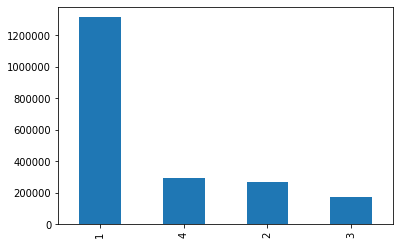

In [15]:
print(pd.value_counts(x_coordinates['well_yield']))
pd.value_counts(x_coordinates['well_yield']).plot.bar()

In [16]:
#exporting the data
x_coordinates.to_csv('prediction_SVC_raw.csv')

# Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
kernels = ['rbf', 'poly','sigmoid']
gammas = [0.1, 1, 10]
cs = [0.1, 1, 10]
degrees = [0, 1, 2, 3, 4]

parameters = [{'kernel': kernels, 'gamma': gammas, 'C': cs,'degree': degrees}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)